In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("train.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 43.2+ KB


In [4]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [6]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [7]:
data.Gender = data.Gender.fillna('Male')

In [8]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [9]:
data.Married = data.Married.fillna('Yes')

In [10]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [11]:
data.Dependents = data.Dependents.fillna('0')

In [12]:
data['Dependents'] = data['Dependents'].replace(['3+'],'3')

In [13]:
data['Dependents'] = data['Dependents'].astype(int)

In [14]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [15]:
data.Self_Employed = data.Self_Employed.fillna('No')

In [16]:
data.LoanAmount = data.LoanAmount.fillna(data.LoanAmount.mean())

In [17]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [18]:
data.Loan_Amount_Term = data.Loan_Amount_Term.fillna(360.0)

In [19]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [20]:
data.Credit_History = data.Credit_History.fillna(1.0)

In [21]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [22]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [23]:
data['Loan_Status'] = [1 if star == 'Y' else 0 for star in data['Loan_Status']];
data['Gender'] = [1 if star == 'Male' else 0 for star in data['Gender']];
data['Married'] = [1 if star == 'Yes' else 0 for star in data['Married']];
data['Education'] = [1 if star == 'Graduate' else 0 for star in data['Education']];
data['Self_Employed'] = [1 if star == 'Yes' else 0 for star in data['Self_Employed']];
data['Property_Area'] = [1 if star == 'Urban' else 0 for star in data['Property_Area']];
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1,1,3,1,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,1,1
612,LP002984,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,1,1


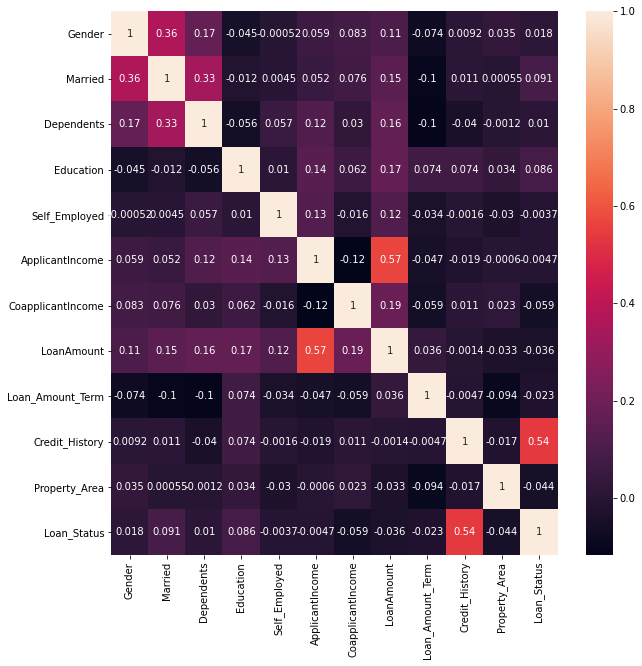

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
cor= data.corr()
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(cor, vmax=1.0, annot=True , ax=ax)

In [25]:
cols = [0,3,5,9,7]
data.drop(data.columns[cols],axis=1,inplace=True)
data.head()

,Gender,Married,Education,ApplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,1,0,1,5849,146.412162,1.0,1,1
1,1,1,1,4583,128.000000,1.0,0,0
2,1,1,1,3000,66.000000,1.0,1,1
3,1,1,0,2583,120.000000,1.0,1,1
4,1,0,1,6000,141.000000,1.0,1,1


In [26]:
y=data.Loan_Status
x=data.drop('Loan_Status',axis=1)

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# Logisitc Regression

In [29]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='lbfgs', max_iter=400)

# fit the model with data
logreg.fit(x_train,y_train)

#
y_pred=logreg.predict(x_test)

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))


Confusion Matrix: 
[[16 23]
 [ 1 83]]


              precision    recall  f1-score   support

           0       0.94      0.41      0.57        39
           1       0.78      0.99      0.87        84

    accuracy                           0.80       123
   macro avg       0.86      0.70      0.72       123
weighted avg       0.83      0.80      0.78       123



In [31]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

print('Precision:', metrics.precision_score(y_test, y_pred,
                                    average='weighted'))
print('Recall:', metrics.recall_score(y_test, y_pred,
                              average='weighted'))

print('F1 score:', metrics.f1_score(y_test,y_pred,
                            average='weighted'))

Accuracy:  0.8048780487804879
Precision: 0.8331664004764354
Recall: 0.8048780487804879
F1 score: 0.7778470566660554


# Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier


clf=RandomForestClassifier(n_estimators= 30,criterion = 'entropy',max_depth=2,random_state=0)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred1=clf.predict(x_test)

In [33]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred1))

print('Precision:', metrics.precision_score(y_test, y_pred1,
                                    average='weighted'))
print('Recall:', metrics.recall_score(y_test, y_pred1,
                              average='weighted'))

print('F1 score:', metrics.f1_score(y_test,y_pred1,
                            average='weighted'))

Accuracy:  0.7560975609756098
Precision: 0.8202824133504493
Recall: 0.7560975609756098
F1 score: 0.6983555062823354


In [34]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred1))
print('\n')
print(classification_report(y_test, y_pred1))


Confusion Matrix: 
[[ 9 30]
 [ 0 84]]


              precision    recall  f1-score   support

           0       1.00      0.23      0.38        39
           1       0.74      1.00      0.85        84

    accuracy                           0.76       123
   macro avg       0.87      0.62      0.61       123
weighted avg       0.82      0.76      0.70       123



# Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier 
clf_gini = DecisionTreeClassifier(criterion = "entropy", 
            random_state = 1,max_depth=2) 
clf_gini.fit(x_train, y_train)

y_pred2=clf_gini.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred2))
print('\n')
print(classification_report(y_test, y_pred2))


Accuracy: 0.8048780487804879
Confusion Matrix: 
[[16 23]
 [ 1 83]]


              precision    recall  f1-score   support

           0       0.94      0.41      0.57        39
           1       0.78      0.99      0.87        84

    accuracy                           0.80       123
   macro avg       0.86      0.70      0.72       123
weighted avg       0.83      0.80      0.78       123



In [36]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred2))

print('Precision:', metrics.precision_score(y_test, y_pred2,
                                    average='weighted'))
print('Recall:', metrics.recall_score(y_test, y_pred2,
                              average='weighted'))

print('F1 score:', metrics.f1_score(y_test,y_pred2,
                            average='weighted'))

Accuracy:  0.8048780487804879
Precision: 0.8331664004764354
Recall: 0.8048780487804879
F1 score: 0.7778470566660554


# Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(x_train, y_train) 
  
# making predictions on the testing set 
y_pred = gnb.predict(x_test) 
  
# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred))

print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

Gaussian Naive Bayes model accuracy(in %): 0.7967479674796748
Confusion Matrix: 
[[16 23]
 [ 2 82]]


              precision    recall  f1-score   support

           0       0.89      0.41      0.56        39
           1       0.78      0.98      0.87        84

    accuracy                           0.80       123
   macro avg       0.83      0.69      0.71       123
weighted avg       0.82      0.80      0.77       123



In [38]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

print('Precision:', metrics.precision_score(y_test, y_pred,
                                    average='weighted'))
print('Recall:', metrics.recall_score(y_test, y_pred,
                              average='weighted'))

print('F1 score:', metrics.f1_score(y_test,y_pred,
                            average='weighted'))

Accuracy:  0.7967479674796748
Precision: 0.8151761517615175
Recall: 0.7967479674796748
F1 score: 0.7705985831788142


# K Nearest Neighbours

In [39]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)
y_pred3 = classifier.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred3))
print('\n')
print(classification_report(y_test, y_pred3))

Accuracy: 0.7886178861788617
Confusion Matrix: 
[[17 22]
 [ 4 80]]


              precision    recall  f1-score   support

           0       0.81      0.44      0.57        39
           1       0.78      0.95      0.86        84

    accuracy                           0.79       123
   macro avg       0.80      0.69      0.71       123
weighted avg       0.79      0.79      0.77       123



In [40]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred3))

print('Precision:', metrics.precision_score(y_test, y_pred3,
                                    average='weighted'))
print('Recall:', metrics.recall_score(y_test, y_pred3,
                              average='weighted'))

print('F1 score:', metrics.f1_score(y_test,y_pred3,
                            average='weighted'))

Accuracy:  0.7886178861788617
Precision: 0.7923071667691466
Recall: 0.7886178861788617
F1 score: 0.7671387359034879
